# Part A


You try contacting the Elves using your handheld device, but the river you're following must be too low to get a decent signal.<br>

You ask the device for a heightmap of the surrounding area (your puzzle input). <br>The heightmap shows the local area from above broken into a grid; <br>the elevation of each square of the grid is given by a single lowercase letter, where a is the lowest elevation, b is the next-lowest, and so on up to the highest elevation, z.

Also included on the heightmap are marks for your current position (S) and the location that should get the best signal (E). <br>Your current position (S) has elevation a, and the location that should get the best signal (E) has elevation z.

You'd like to reach E, but to save energy, you should do it in as few steps as possible. During each step, <br>you can move exactly one square up, down, left, or right. <br>To avoid needing to get out your climbing gear, the elevation of the destination square can be at most one higher than the elevation of your current square; that is, <br>if your current elevation is m, you could step to elevation n, but not to elevation o.<br> (This also means that the elevation of the destination square can be much lower than the elevation of your current square.)<br>

For example:<br>

Sabqponm<br>
abcryxxl<br>
accszExk<br>
acctuvwj<br>
abdefghi<br>
Here, you start in the top-left corner; your goal is near the middle. You could start by moving down or right,<br> but eventually you'll need to head toward the e at the bottom. From there, you can spiral around to the goal:

"v..v<<<<"<br>
">v.vv<<^"<br>
.>vv>E^^<br>
..v>>>^^<br>
..>>>>>^<br>
In the above diagram, the symbols indicate whether the path exits each square moving up (^), down (v), left (<), or right (>). <br>The location that should get the best signal is still E, and . marks unvisited squares.

This path reaches the goal in 31 steps, the fewest possible.<br>

What is the fewest steps required to move from your current position to the location that should get the best signal?<br>

In [261]:
import numpy as np
import sys
from string import ascii_lowercase
from copy import deepcopy
import tqdm 

In [3]:
sys.path.append("..")

In [4]:
from utilities.utils import get_puzzle, submit_answer

In [5]:
path = "../data/sample_12.txt"

In [6]:
with open(path, 'r') as file:
  # Read the contents of the file into a list
  data = file.readlines()

In [7]:
data = [x.replace("\n", "") for x in data]

In [8]:
data

['Sabqponm', 'abcryxxl', 'accszExk', 'acctuvwj', 'abdefghi']

In [11]:
arr = np.array([list(d) for d in data])

In [12]:
arr

array([['S', 'a', 'b', 'q', 'p', 'o', 'n', 'm'],
       ['a', 'b', 'c', 'r', 'y', 'x', 'x', 'l'],
       ['a', 'c', 'c', 's', 'z', 'E', 'x', 'k'],
       ['a', 'c', 'c', 't', 'u', 'v', 'w', 'j'],
       ['a', 'b', 'd', 'e', 'f', 'g', 'h', 'i']], dtype='<U1')

1) Check if S, if so then replace with a
2) check for possible moves
3) iterate over each move recursivley - make the move. After return whether end was found or not

In [39]:
start = list(np.where(arr=="S"))
start

[array([0]), array([0])]

In [60]:
letters = list(ascii_lowercase)

In [85]:
current_pos = [3, 2]

In [134]:
def get_moves(start, arr, move_store, route_id, previous_position=None):
    possible_moves = []
    for m in [(1, 0), (-1, 0), (0, -1), (0, 1)]:
        pm = deepcopy(start)
        pm[0] += m[0]
        pm[1] += m[1]
        if pm[0] >= 0 and pm[0] <= arr.shape[0] and pm[1] >= 0 and pm[1] <= arr.shape[1]:
            print(f"pm = {pm}")
            print(f"pp = {previous_position}")
            if pm in move_store[route_id]:
                print(f"Discarding {pm} as previously visited")
            else:
                print(f"Route = {move_store[route_id]}")
                start_height = arr[start[0], start[1]]
                dst_height = arr[pm[0], pm[1]]
                start_height = "a" if start_height == "S" else start_height
                dst_height = "z" if dst_height == "E" else dst_height
                if letters.index(dst_height) - letters.index(start_height) < 2:
                    possible_moves.append(pm)
    return possible_moves

In [135]:
def make_move(current_position, move):
    previous_position = deepcopy(current_position)
    current_position[0] = move[0]
    current_position[1] = move[1]
    return current_position, previous_position

In [136]:
def play_turn(current_position, arr, move_store, route_id=0, previous_position=None):
    print(f"Current Pos = {current_position}")
    if arr[current_position[0], current_position[1]] == "E":
        return True, current_position, previous_position, move_store
    moves = get_moves(current_position, arr, move_store, route_id, previous_position)
    if len(moves) == 0:
        return False, current_position, previous_position, move_store
    for i, move in enumerate(moves):
        if i > 0: # need to make a new route
            route = move_store[route_id]
            route.append(move)
            move_store[route_id+1] = route
            cp, pp = make_move(current_position, move)
            print(f"Made move from {pp} to {cp}")
            _, cp, pp, move_store = play_turn(cp, arr, move_store, route_id+1, pp)
        else:
            move_store[route_id].append(move)
            cp, pp = make_move(current_position, move)
            print(f"Made move from {pp} to {cp}")
    return False, cp, pp, move_store

In [137]:
start

[array([9]), array([9])]

In [139]:
play_turn([0, 0], arr, {0:[[0, 0]]})

Current Pos = [0, 0]
pm = [1, 0]
pp = None
Route = [[0, 0]]
pm = [0, 1]
pp = None
Route = [[0, 0]]
Made move from [0, 0] to [1, 0]
Made move from [1, 0] to [0, 1]
Current Pos = [0, 1]
pm = [1, 1]
pp = [1, 0]
Route = [[0, 0], [1, 0], [0, 1]]
pm = [0, 0]
pp = [1, 0]
Discarding [0, 0] as previously visited
pm = [0, 2]
pp = [1, 0]
Route = [[0, 0], [1, 0], [0, 1]]
Made move from [0, 1] to [1, 1]
Made move from [1, 1] to [0, 2]
Current Pos = [0, 2]
pm = [1, 2]
pp = [1, 1]
Route = [[0, 0], [1, 0], [0, 1], [1, 1], [0, 2]]
pm = [0, 1]
pp = [1, 1]
Discarding [0, 1] as previously visited
pm = [0, 3]
pp = [1, 1]
Route = [[0, 0], [1, 0], [0, 1], [1, 1], [0, 2]]
Made move from [0, 2] to [1, 2]


(False,
 [1, 2],
 [0, 2],
 {0: [[0, 0], [1, 0], [0, 1], [1, 1], [0, 2], [1, 2]],
  1: [[0, 0], [1, 0], [0, 1], [1, 1], [0, 2], [1, 2]],
  2: [[0, 0], [1, 0], [0, 1], [1, 1], [0, 2], [1, 2]]})

In [87]:
get_moves(current_pos, [2, 2])

[3, 2]
d
[3, 2]
c
[3, 2]
t


[[4, 2], [3, 1]]

In [58]:
start_height = arr[start[0], start[1]]
dst_height = arr[pm[0], pm[1]]

In [59]:
start_height == "S"

array([ True])

In [57]:
list(ascii_lowercase).index(arr[pm[0], pm[1]].squeeze())

0

In [52]:
arr[pm[0], pm[1]]

array(['a'], dtype='<U1')

In [37]:
start[1] + m[1]

array([1])

# Breadth first algorithm


In [184]:
def check_move(current_position: list, possible_position: list, arr: np.ndarray, maze: np.ndarray):
    """
    
    """
    p_i, p_j = possible_position
    if p_i < 0 or p_j < 0 or p_i >= arr.shape[0] or p_j >= arr.shape[1]:
        return False
    if maze[p_i, p_j] != 0:
        return False
    c_i, c_j = current_position
    current_height = arr[c_i, c_j]
    current_height = "a" if current_height == "S" else current_height
    possible_height = arr[p_i, p_j]
    possible_height = "a" if possible_height == "S" else possible_height
    possible_height = "z" if possible_height == "E" else possible_height
    if letters.index(possible_height) - letters.index(current_height) < 2:
        return True
    else:
        return False
    

In [185]:
def make_step(k: int, arr: np.ndarray, maze: np.ndarray):
    rows, cols = np.where(maze == k)
    for cp_i, cp_j in zip(rows, cols):
        moves = [(1, 0), (-1, 0), (0, -1), (0, 1)]
        for move in moves:
            pp_i = deepcopy(cp_i)
            pp_i += move[0]
            pp_j = deepcopy(cp_j)
            pp_j += move[1]
            if check_move([cp_i, cp_j], [pp_i, pp_j], arr, maze):
                maze[pp_i, pp_j] = k + 1
    return maze

In [193]:
def extract_route(m: np.ndarray, end: list):
    i, j = end
    k = m[i][j]
    the_path = [(i,j)]
    while k > 1:
      if i > 0 and m[i - 1][j] == k-1:
        i, j = i-1, j
        the_path.append((i, j))
        k-=1
      elif j > 0 and m[i][j - 1] == k-1:
        i, j = i, j-1
        the_path.append((i, j))
        k-=1
      elif i < len(m) - 1 and m[i + 1][j] == k-1:
        i, j = i+1, j
        the_path.append((i, j))
        k-=1
      elif j < len(m[i]) - 1 and m[i][j + 1] == k-1:
        i, j = i, j+1
        the_path.append((i, j))
        k -= 1
    return the_path

In [196]:
from solutions.day_12 import draw_route

In [221]:
import matplotlib.pyplot as plt

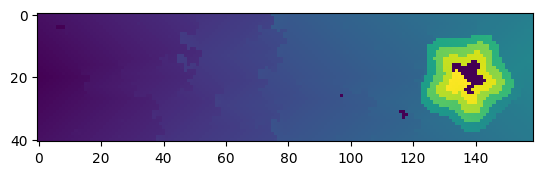

In [222]:
plt.imshow(maze)

In [202]:
data = get_puzzle(year=2022, day=12)
data = data.split("\n")
arr = np.array([list(d) for d in data])

In [218]:
def solve_maze(arr: np.ndarray):
    maze = np.zeros(arr.shape)
    start_i, start_j = np.where(arr=="S")
    end_i, end_j = np.where(arr=="E")
    maze[start_i, start_j] = 1
    
    # run the breadth firsth search algorithm (BFS)
    k=0
    while maze[end_i, end_j] == 0:
        k+=1
        maze = make_step(k, arr, maze)
        
    # extract the shortest route from the map
    route = extract_route(maze, [int(end_i), int(end_j)])
    print(f"Shortest path is {len(route) - 1} steps!")
    return draw_route(route, arr.shape)

Shortest path is 504 steps!


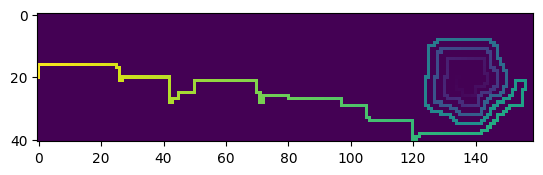

In [219]:
solve_maze(arr)

# Part Two

As you walk up the hill, you suspect that the Elves will want to turn this into a hiking trail. <br>The beginning isn't very scenic, though; perhaps you can find a better starting point.

To maximize exercise while hiking, the trail should start as low as possible: elevation a. <br>The goal is still the square marked E. However, the trail should still be direct, <br>taking the fewest steps to reach its goal. So, you'll need to find the shortest path from any square at elevation a to the square marked E.

Again consider the example from above:<br>

Sabqponm<br>
abcryxxl<br>
accszExk<br>
acctuvwj<br>
abdefghi<br>
Now, there are six choices for starting position (five marked a, plus the square marked S that counts as being at elevation a). <br>If you start at the bottom-left square, you can reach the goal most quickly:

...v<<<<<br>
...vv<<^<br>
...v>E^^<br>
.>v>>>^^<br>
">^>>>>>^<br>
This path reaches the goal in only 29 steps, the fewest possible.

What is the fewest steps required to move starting from any square with elevation a to the <br>location that should get the best signal?

## Test data

In [223]:
path = "../data/sample_12.txt"

In [224]:
with open(path, 'r') as file:
  # Read the contents of the file into a list
  data = file.readlines()

In [225]:
data = [x.replace("\n", "") for x in data]

In [239]:
arr = np.array([list(d) for d in data])

In [232]:
arr

array([['S', 'a', 'b', 'q', 'p', 'o', 'n', 'm'],
       ['a', 'b', 'c', 'r', 'y', 'x', 'x', 'l'],
       ['a', 'c', 'c', 's', 'z', 'E', 'x', 'k'],
       ['a', 'c', 'c', 't', 'u', 'v', 'w', 'j'],
       ['a', 'b', 'd', 'e', 'f', 'g', 'h', 'i']], dtype='<U1')

In [228]:
arr[np.where(arr=="S")] = "a"

In [238]:
arr

array([['a', 'a', 'b', 'q', 'p', 'o', 'n', 'm'],
       ['a', 'b', 'c', 'r', 'y', 'x', 'x', 'l'],
       ['a', 'c', 'c', 's', 'z', 'E', 'x', 'k'],
       ['a', 'c', 'c', 't', 'u', 'v', 'w', 'j'],
       ['a', 'b', 'd', 'e', 'f', 'g', 'h', 'i']], dtype='<U1')

In [263]:
def solve_maze_partb(arr: np.ndarray):
    arr[np.where(arr=="S")] = "a"
    rows, cols = np.where(arr=="a")
    print(f"{len(rows)} starting points to be tested!")
    route_store = {}
    k_max = 1000000
    for start_i, start_j in tqdm.tqdm(zip(rows, cols)):
        maze = np.zeros(arr.shape)
        end_i, end_j = np.where(arr=="E")
        maze[start_i, start_j] = 1

        # run the breadth firsth search algorithm (BFS)
        k=0
        finished = True
        while maze[end_i, end_j] == 0:
            if k > k_max:
                finished = False
                break
            k+=1
            maze = make_step(k, arr, maze)
            
        if finished:
            # extract the shortest route from the map
            route = extract_route(maze, [int(end_i), int(end_j)])
            # print(f"Shortest path is {len(route) - 1} steps!")
            route_store[(int(start_i), int(start_j))] = dict(length=len(route) - 1, 
                                                  route=route)
            k_max = k
    lengths = [v["length"] for k,v in route_store.items()]
    shortest_route = [k for k,v in route_store.items() if v["length"] == min(lengths)][0]
    return route_store, shortest_route

In [264]:
paths, route_key = solve_maze_partb(arr)

1863 starting points to be tested!


1863it [00:37, 49.36it/s]


In [265]:
route_key

(14, 0)

In [266]:
paths.keys()

dict_keys([(0, 0), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (1, 0), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (12, 0), (13, 0), (14, 0), (15, 0), (16, 0), (17, 0), (18, 0), (19, 0), (20, 0), (21, 0), (22, 0), (23, 0), (24, 0), (25, 0), (26, 0), (27, 0), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0), (34, 2), (35, 0), (35, 2), (36, 0), (36, 2), (37, 0), (38, 0), (39, 0), (40, 0)])

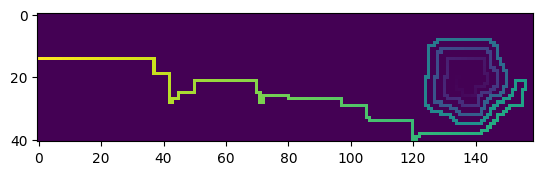

In [267]:
draw_route(paths[route_key]["route"], arr.shape)

## full puzzle

In [268]:
data = get_puzzle(year=2022, day=12)
data = data.split("\n")
arr = np.array([list(d) for d in data])

In [269]:
paths, route_key = solve_maze_partb(arr)

1863 starting points to be tested!


1863it [00:39, 47.46it/s]


In [270]:
paths[route_key]["length"]

500

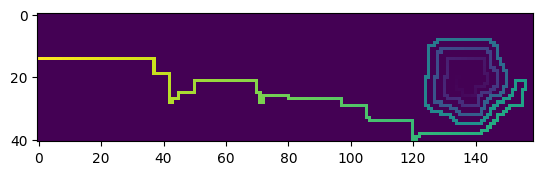

In [271]:
draw_route(paths[route_key]["route"], arr.shape)

In [272]:
submit_answer?

Signature: submit_answer(answer, part: str, day: int, year: int)
Docstring: <no docstring>
File:      ~/PycharmProjects/AdventOfCode/utilities/utils.py
Type:      function


In [273]:
submit_answer(500, 'b', 12, 2022)

That's the right answer!  You are one gold star closer to collecting enough star fruit.You have completed Day 12! You can [Shareon
  Twitter
Mastodon] this victory or [Return to Your Advent Calendar].
